# **Taller #3 Metodos Computacionales**


---

Realizado por: Juan Sebastian Pabon Martínez y Karen Polo


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix
import sympy as sym
import urllib.request
import pandas as pd
from numpy.ma.core import sqrt

In [ ]:
#Ejercicios: Álgebra lineal
#Problemas: 4,5

#Ejercicios: Mínimos Cuadrados
#Problemas: 6

#Algebra lineal 

In [ ]:
#3
A=np.array([[1,0,0],[5,1,0],[-2,3,1]])
B=np.array([[4,-2,1],[0,3,7],[0,0,2]])


def multi_matricial (A,B):
  matrix= A.copy()
  for i in range(len(A)):
    linea = A[i,:]
    for j in range(len(B)):
      columna= B[:,j]
      value= np.dot(columna,linea)
      matrix[i][j]=value

  return matrix

M= multi_matricial(A,B)
print("El resultado de la multiplicación entre las dos matrices es:" )
print(M)
      

El resultado de la multiplicación entre las dos matrices es:
[[ 4 -2  1]
 [20 -7 12]
 [-8 13 21]]


In [ ]:
#3,4

Si partimos de un sistema de ecuaciones de la forma $Ax=B$ y le aplicamos la descomopoción LU donde L es una matriz triangular superior y U una matriz triangular inferior, de modo que pudemos usar la matriz triangular superior L, por lo que el sistema de ecuaciones queda.

$$\begin{pmatrix}
A_{00} & 0 & 0 & \cdots & \cdots & 0 & 0\\
A_{10} & A_{11} & 0 & \cdots & \cdots & 0 & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
A_{i1} & A_{i2} & \cdots & A_{ii} & 0 &\cdots & 0\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
A_{n1} & A_{n2} & \cdots & \cdots &\cdots &\cdots & A_{nn}
\end{pmatrix}
\begin{pmatrix}
x_{0} \\
x_{1} \\
\vdots \\
x_{i}\\
\vdots \\
x_{n}
\end{pmatrix}
=
\begin{pmatrix}
b_{0} \\
b_{1} \\
\vdots \\
\vdots \\
b_{i}\\
\vdots \\
b_{n}
\end{pmatrix}$$
$$ $$

Las escuaciones que describe el sistema serian $A_{00}x_0=b_0$

$$
x_0=\frac{b_0}{A_{00}}
$$

para $$  x_1= \frac{b_1-A_{10}x_0}{A_{11}}$$

Si segimos el sistema llegaremos a

$$b_i=A_{i0}x_{0} + A_{i1}x_{1}+\cdots+A_{ii}x_{i}$$
Por lo que
$$x_i=\frac{b_i-\sum_{j=0}^{i-1}A_{ij}x_j}{A_{ii}}$$

Que es precisamente la sustitución planteada en un inicio(Sutitucion hacia adelante)

Ahora bien, para el caso de la sustitucion hacia atras no utilizaremos la matriz superior L sino la matriz inferior U, Por lo que nuestro sistema ahora esta descrito como: 

$$\begin{pmatrix}
A_{11} & A_{12} & A_{13} & \cdots & \cdots & A_{1 n-1} & A_{1n}\\
0 & A_{22} & A_{23} & \cdots & \cdots & A_{2 n-1} & A_{2n}\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
0 & 0 & \cdots & A_{ii} & \cdots &\cdots & A_{in}\\
\vdots & \vdots & \vdots & \ddots & \vdots &\vdots &\vdots \\
0 & 0 & \cdots & \cdots &\cdots &\cdots & A_{nn}
\end{pmatrix}
\begin{pmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{i}\\
\vdots \\
x_{n}
\end{pmatrix}
=
\begin{pmatrix}
b_{1} \\
b_{2} \\
\vdots \\
\vdots \\
b_{i}\\
\vdots \\
b_{n}
\end{pmatrix}$$


Las escuaciones que describe el sistema serian 

$A_{11}x_1+A_{12}x_2+\cdots+A_{1j}x_j=b_1$

$$
x_1=\frac{b_1-A_{12}x_2-\cdots-A_{1j}x_j}{A_{11}}
$$

para $$  x_1= \frac{b_1-A_{10}x_0}{A_{11}}$$

Si segimos el sistema llegaremos a

$$b_{i}=A_{ii}x_{i}+\cdots+A_{iJ}x_{J}$$
$$x_{i}=\frac{b_{i}-A_{i i+1}x_{i+1}-\cdots-L_{ij}x_{j}}{A_{ii}}$$


Y simplificando llegamos a 
$$x_{i}= \frac{b_{i} -\sum_{n=i+1}^{j}A_{ij}x_{j}}{A_{ii}}$$
Que es precisamente la sustitución planteada en un inicio(Sutitución hacia atras)

In [ ]:
#7

A = np.array([[4,-2,1],[20,-7,12],[-8,13,17]])

def factorizacion_LU(A):
  L= np.array([[1,0,0],[0,1,0],[0,0,1]])
  
  U= A.copy()
  linea1= A[0,:]
  linea2= A[1,:]
  linea3= A[2,:]

  valor1= -(linea2[0]/linea1[0])
  L[1][0]=-valor1
  new_line = (valor1*linea1)+ linea2
  U[1,:]=new_line

  valor2 = -(linea3[0]/linea1[0])
  L[2][0]=-valor2
  new_line = (valor2*linea1)+ linea3
  U[2,:]=new_line

  valor3 = -(U[2,:][1]/U[1,:][1])
  L[2][1]=-valor3
  new_line= (valor3*U[1,:]+U[2,:])
  U[2,:]=new_line

  return L,U

L,U= factorizacion_LU(A)
print("La descompoción LU de la matriz es igual a:")
print("L: ")
print(L)
print("U: ")
print(U)

La descompoción LU de la matriz es igual a:
L: 
[[ 1  0  0]
 [ 5  1  0]
 [-2  3  1]]
U: 
[[ 4 -2  1]
 [ 0  3  7]
 [ 0  0 -2]]


In [ ]:
#9

#Generamos la matiz a diagonalizar
M= np.array([[4,1,1],[1,3,2],[1,2,5]])

#a) 
def Jacobi(D, it=1000):
  A=D.copy()
  size= len(A)
  Z= -np.identity(size)

  #Hallamos el valor no diagonal más grande
  for k in range(it):
        Pos = (0, 0)
        mayor = 0
        for i in range(size):
            for j in range(i+1, size):
                if i!=j:
                  value= A[i][j]
                  if value > mayor:
                    Pos = (i,j)
                    mayor = value

        fila= Pos[0]
        Columna = Pos[1]
      

    #Establecemos el angulo de rotacion
        if A[fila][fila]== A[Columna][Columna]:
          theta = np.pi/4
        else:
          t = (2*A[fila][Columna])/(A[Columna][Columna]-A[fila][fila])
          if t >= 0:
            theta = 0.5 * np.tan(t)
          else:
            theta = 0.5 * np.tan(t) + np.pi

        valors_Matriz= np.identity(size)

        valors_Matriz[fila][fila]= np.cos(theta)
        valors_Matriz[Columna][Columna]= np.cos(theta)
        valors_Matriz[fila][Columna]= np.sin(theta)
        valors_Matriz[Columna][fila]= -np.sin(theta)

        A = np.dot(valors_Matriz.T, np.dot(A, valors_Matriz))
        Z=  np.dot(Z, valors_Matriz)
 
  return np.diag(A),Z

eigen_value, eigen_vectors= Jacobi(M)
print("Tras ralizar la diagonalización de la matriz a traves del metodo Jacobi, los valores propios son: {} , y los vectores corrrespondiente a dichos valores son: ".format(eigen_value))
print(eigen_vectors)

Tras ralizar la diagonalización de la matriz a traves del metodo Jacobi, los valores propios son: [6.89510652 3.39729507 1.70759841] , y los vectores corrrespondiente a dichod valores son: 
[[ 0.43170413 -0.88573564 -0.17059871]
 [ 0.49725362  0.07589338  0.86427949]
 [ 0.75257583  0.45794385 -0.47319874]]


In [ ]:
#Comparamos 
#b)
eigen_value,eigen_vec= np.linalg.eig(M)
print("El valor y los vecotres dados por el paquete son: ")
print(eigen_value)
print(eigen_vec)

El valor y los vecotres dados por el paquete son: 
[6.89510652 3.39729507 1.70759841]
[[ 0.43170413  0.88573564  0.17059871]
 [ 0.49725362 -0.07589338 -0.86427949]
 [ 0.75257583 -0.45794385  0.47319874]]


Podemos Apreciar que ambos resultados son iguales

In [ ]:
#10 Potencia inversa

H= np.array([[1,2,-1],[1,0,1],[4,-4,5]])
xi = -np.random.rand(3)

def poten_inversa(xi,H,itmax=1000,tolerancia=1e-5):
  eigen_value= 0
  x= xi/np.linalg.norm(xi)
  for i in range(itmax):
    x_0= np.linalg.solve(H,x)
    x_0= x_0/np.linalg.norm(x_0)
    eigen_value_= np.dot(x_0,x)

    if np.abs(eigen_value_-eigen_value)< tolerancia:
      break

    x= x_0
    eigen_value= eigen_value_
  
  eigen_vector= x
  eigen_value= 1/eigen_value
  return eigen_vector,eigen_value

eigen_vector, eigen_value= poten_inversa(xi,H)
print("El eigen_vector asociado al hamiltoniado presentado es {} y el valor propio del vector es {}".format(eigen_vector,eigen_value))

El eigen_vector asociado al hamiltoniado presentado es [ 0.40760593 -0.41100885 -0.81543187] y el valor propio del vector es 1.0000046193398044


In [ ]:

#12
#a
def jacobian_4(f, x, h): #Derivada de cuarto orden para cada funcion entrante
    n = len(f)
    jacobian_matrix = np.zeros((n,n))
    for i in range(n):
      jacobian_matrix[i,0]= (f[i]( x[0] - 2*h,x[1],x[2]) - 8*f[i]( x[0] - h,x[1],x[2])+8*f[i]( x[0] +h,x[1],x[2]) - f[i]( x[0] + 2*h,x[1],x[2]))/(12*h)
      jacobian_matrix[i,1]= (f[i]( x[0] ,x[1]-2*h,x[2]) - 8*f[i]( x[0],x[1]-h,x[2])+8*f[i]( x[0] ,x[1]+h,x[2]) - f[i]( x[0],x[1]+2*h,x[2]))/(12*h)
      jacobian_matrix[i,2]= (f[i]( x[0],x[1],x[2]-2*h) - 8*f[i]( x[0],x[1],x[2]-h)+8*f[i]( x[0],x[1],x[2]+h) - f[i]( x[0],x[1],x[2]+2*h))/(12*h)
      
    return jacobian_matrix.T

#b #Definimos las funciones

F= [lambda x_1,x_2,x_3 : 6*x_1-2*np.cos(x_2*x_3)-1,
    lambda x_1,x_2,x_3:9*x_2+(np.sqrt(x_1**2+np.sin(x_3)+1.06)+0.9),
    lambda x_1,x_2,x_3:60*x_3+3*np.exp(-x_1*x_2)+10*np.pi-3]

print(jacobian_4(F,[0.5,0.5,0.5],0.01))


[[ 6.          0.37377753 -1.16820117]
 [ 0.24740396  9.         -1.16820117]
 [ 0.24740396  0.32802064 60.        ]]


In [ ]:
#c #Realizamos el mismo procedimiento con la derivada de segundo orden
def jacobian_2(f,x,h):
  n=len(f)
  jacobian_matrix = np.zeros((n,n))
  for i in range(n):
    jacobian_matrix[i,0]= (f[i]( x[0] + h,x[1],x[2]) - f[i]( x[0] - h,x[1],x[2]))/(2*h)
    jacobian_matrix[i,1]= (f[i]( x[0] ,x[1]+h,x[2]) - f[i]( x[0],x[1]-h,x[2]))/(2*h)
    jacobian_matrix[i,2]= (f[i]( x[0] ,x[1],x[2]+h) - f[i]( x[0],x[1],x[2]-h))/(2*h)

  return jacobian_matrix.T


print(jacobian_2(F,[0.5,0.5,0.5],0.01))

[[ 6.          0.37376854 -1.16820604]
 [ 0.24740293  9.         -1.16820604]
 [ 0.24740293  0.32801836 60.        ]]


In [ ]:
#el valor de h para el cual h^2 es igual con la aproximacion h^4 es: 1e-5
print(jacobian_2(F,[0.5,0.5,0.5],1e-5))

[[ 6.          0.37377753 -1.16820117]
 [ 0.24740396  9.         -1.16820117]
 [ 0.24740396  0.32802064 60.        ]]


In [ ]:
#13 
Jx = sym.matrices.Matrix([[0, 0, 0], [0, 0, -1], [0, 1, 0]])
Jy = sym.matrices.Matrix([[0, 0, 1], [0, 0, 0], [-1, 0, 0]])
Jz = sym.matrices.Matrix([[0, -1, 0], [1, 0, 0], [0, 0, 0]])

J=[Jx,Jy,Jz]

def operation(A,B): #Comutador
  return A*B-B*A

#Verificamos para los posibles casos

In [ ]:
#Jx,Jy
operation(J[0],J[1])

Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 0]])

Se cumple que $[J_x,J_y]=\epsilon_{ijk}J_{z}$, ya que $\epsilon_{xyz}=1$ y

$$J_{z}=\begin{pmatrix}
0 & -1 & 0 \\
1 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} $$

In [ ]:
#Jx,Jz
operation(J[0],J[2])

Matrix([
[0, 0, -1],
[0, 0,  0],
[1, 0,  0]])

Se cumple que $[J_x,J_z]=\epsilon_{ijk}J_{y}$, ya que $\epsilon_{xyz}=-1$ y

$$J_{y}=\begin{pmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{pmatrix} $$

In [ ]:
#Jy,Jx
operation(J[1],J[0])

Matrix([
[ 0, 1, 0],
[-1, 0, 0],
[ 0, 0, 0]])

Se cumple que $[J_y,J_x]=\epsilon_{ijk}J_{z}$, ya que $\epsilon_{xyz}=-1$ y

$$J_{z}=\begin{pmatrix}
0 & -1 & 1 \\
1 & 0 & 0 \\
0 & 0 & 0
\end{pmatrix} $$

In [ ]:
#Jz,Jx
operation(J[2],J[0])

Matrix([
[ 0, 0, 1],
[ 0, 0, 0],
[-1, 0, 0]])

Se cumple que $[J_z,J_x]=\epsilon_{ijk}J_{y}$, ya que $\epsilon_{xyz}=1$ y

$$J_{y}=\begin{pmatrix}
0 & 0 & 1 \\
0 & 0 & 0 \\
-1 & 0 & 0
\end{pmatrix} $$

In [ ]:
#Jz,Jy
operation(J[2],J[1])

Matrix([
[0,  0, 0],
[0,  0, 1],
[0, -1, 0]])

Se cumple que  $[J_{y},J_{z}]=\epsilon_{ijk}J_{x}$ ya que $\epsilon_{xyz}=-1$ y 
$$J_{x}=\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & 1 \\
0 & -1 & 0
\end{pmatrix} $$

In [ ]:
#Jy,Jz
operation(J[1],J[2])

Matrix([
[0, 0,  0],
[0, 0, -1],
[0, 1,  0]])

Se cumple que  $[J_{y},J_{z}]=\epsilon_{ijk}J_{x}$ ya que $\epsilon_{xyz}=1$ y 
$$J_{x}=\begin{pmatrix}
0 & 0 & 0 \\
0 & 0 & -1 \\
0 & 1 & 0
\end{pmatrix} $$

In [ ]:
#Jx,Jx
operation(J[0],J[0])

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{x},J_{x}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$ 

In [ ]:
#Jy,Jy
operation(J[1],J[1])

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{y},J_{y}]=\epsilon_{ijk}J_{z}$ ya que $\epsilon_{xyz}=0$

In [ ]:
#Jz,Jz
operation(J[1],J[1])

Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])

Se cumple que  $[J_{z},J_{z}]=\epsilon_{ijk}J_{x}$ ya que $\epsilon_{xyz}=0$

In [ ]:
#14 
s_x= sym.matrices.Matrix([[0,1],[1,0]])
s_y= sym.matrices.Matrix([[0,-1j],[1j,0]])
s_z= sym.matrices.Matrix([[1,0],[0,-1]])

def conmutador (A,B):
  return A*B-B*A

#Verificamos los posibles casos

In [ ]:
#s_x,s_y
conmutador(s_x,s_y)

Matrix([
[2.0*I,      0],
[    0, -2.0*I]])

Se cumple que  $[\sigma_{x},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{x}=\begin{pmatrix}
 1 & 0 \\
 0 & -1 
\end{pmatrix} $$

In [ ]:
#s_x,s_z
conmutador(s_x,s_z)

Matrix([
[0, -2],
[2,  0]])

Se cumple que  $[\sigma_{x},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{y}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{y}=\begin{pmatrix}
 0 & -i \\
 i & 0 
\end{pmatrix} $$

In [ ]:
#s_y,s_x
conmutador(s_y,s_x)

Matrix([
[-2.0*I,     0],
[     0, 2.0*I]])

Se cumple que  $[\sigma_{y},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{z}=\begin{pmatrix}
 1 & 0 \\
 0 & -1 
\end{pmatrix} $$

In [ ]:
#s_z,s_x
conmutador(s_z,s_x)

Matrix([
[ 0, 2],
[-2, 0]])

Se cumple que  $[\sigma_{z},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{y}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{y}=\begin{pmatrix}
 0 & -i \\
 i& 0 
\end{pmatrix} $$

In [ ]:
#s_y,s_z
conmutador(s_y,s_z)

Matrix([
[    0, 2.0*I],
[2.0*I,     0]])

Se cumple que  $[\sigma_{y},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=1$ y 
$$\sigma_{x}=\begin{pmatrix}
 0 & 1 \\
 1 & 0 
\end{pmatrix} $$

In [ ]:
#s_z,s_y
conmutador(s_z,s_y)

Matrix([
[     0, -2.0*I],
[-2.0*I,      0]])

Se cumple que  $[\sigma_{z},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=-1$ y 
$$\sigma_{x}=\begin{pmatrix}
 0 & 1 \\
 1& 0 
\end{pmatrix} $$

In [ ]:
#s_x,s_x
conmutador(s_x,s_x)

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{x},\sigma_{x}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=0$

In [ ]:
#s_y,s_y
conmutador(s_y,s_y)

Matrix([
[0, 0],
[0, 0]])

Se cumple que  $[\sigma_{y},\sigma_{y}]=2i \epsilon_{ijk} \sigma_{z}$ ya que $\epsilon_{xyz}=0$

In [ ]:
#s_z,s_z
conmutador(s_z,s_z)

Se cumple que  $[\sigma_{z},\sigma_{z}]=2i \epsilon_{ijk} \sigma_{x}$ ya que $\epsilon_{xyz}=0$

In [ ]:
#15
G_0= sym.matrices.Matrix([[1,0,0,0],[0,1,0,0],[0,0,-1,0],[0,0,0,-1]])
G_1= sym.matrices.Matrix([[0,0,0,1],[0,0,1,0],[0,-1,0,0],[-1,0,0,0]])
G_2= sym.matrices.Matrix([[0,0,0,-1j],[0,0,1j,0],[0,1j,0,0],[-1j,0,0,0]])
G_3= sym.matrices.Matrix([[0,0,1,0],[0,0,0,-1],[-1,0,0,0],[0,1,0,0]])

def anticonmutacion (A,B):
  return A*B+B*A

#verificamos los casos

 Para el primer caso, podemos observar que sin importar el orden de los índices, el resultado obtenido es la matriz cero.

In [ ]:
#G_0,G_1
anticonmutacion(G_0,G_1)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_0,G_2
anticonmutacion(G_0,G_2)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_0,G_3
anticonmutacion(G_0,G_3)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_1,G_0
anticonmutacion(G_1,G_0)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_2,G_0
anticonmutacion(G_2,G_0)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_3,G_0
anticonmutacion(G_3,G_0)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_1,G_2
anticonmutacion(G_1,G_2)


Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_1,G_3
anticonmutacion(G_1,G_3)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_2,G_1
anticonmutacion(G_2,G_1)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_3,G_1
anticonmutacion(G_3,G_1)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_2,G_3
anticonmutacion(G_2,G_3)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#G_3,G_2
anticonmutacion(G_3,G_2)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [ ]:
#Casos i=j

Sin embargo para el segundo caso, podemos observar que el resultado estara dado por $2\mathbb{I}_{4x4}$ para $γ_0$ y $-2\mathbb{I}_{4x4}$ para cualquier otro $γ_1$


In [ ]:
#G_0,G_0
anticonmutacion(G_0,G_0)

Matrix([
[2, 0, 0, 0],
[0, 2, 0, 0],
[0, 0, 2, 0],
[0, 0, 0, 2]])

In [ ]:
#G_1,G_1
anticonmutacion(G_1,G_1)

Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

In [ ]:
#G_2,G_2
anticonmutacion(G_2,G_2)

Matrix([
[-2.0,    0,    0,    0],
[   0, -2.0,    0,    0],
[   0,    0, -2.0,    0],
[   0,    0,    0, -2.0]])

In [ ]:
#G_3,G_3
anticonmutacion(G_3,G_3)

Matrix([
[-2,  0,  0,  0],
[ 0, -2,  0,  0],
[ 0,  0, -2,  0],
[ 0,  0,  0, -2]])

Por lo que podemos decir que la matriz de anticomunaticon esta determinada a partir de las siguentes relaciones


$$\begin{bmatrix}
(\gamma^0,\gamma^0) & (\gamma^0,\gamma^1) & (\gamma^0,\gamma^2) & (\gamma^0,\gamma^3) \\
(\gamma^1,\gamma^0) & (\gamma^1,\gamma^1) & (\gamma^1,\gamma^2) & (\gamma^1,\gamma^3) \\
(\gamma^2,\gamma^0) & (\gamma^2,\gamma^1) & (\gamma^2,\gamma^2) & (\gamma^2,\gamma^3) \\
(\gamma^3,\gamma^0) & (\gamma^3,\gamma^1) & (\gamma^3,\gamma^2) & (\gamma^3,\gamma^3) 
\end{bmatrix}
\rightarrow
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & -1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & -1 
\end{bmatrix}$$

#Minimos Cuadrados

El punto comun a las 3 grafícas de escuenta en las coordenadas1.4285714285714286
La distancia minima es: 2.5354627641855494


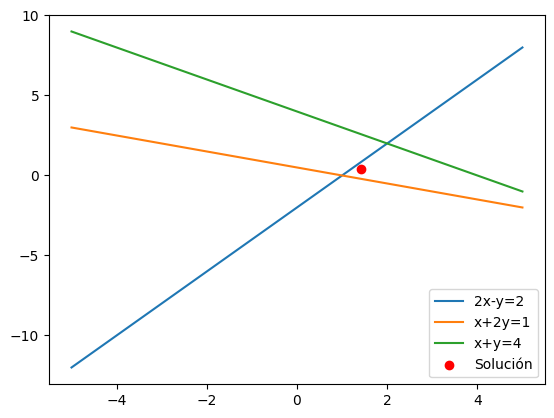

In [ ]:

#1
x=np.array([2,1,1])
y=np.array([-1,2,1])
b= np.array([2,1,4])

X= np.linspace(-5,5,100)
y1=[]
y2=[]
y3=[]
for i in X:
  y_1=2*i-2
  y_2=(1-i)/2
  y_3=4-i
  y1.append(y_1)
  y2.append(y_2)
  y3.append(y_3)

plt.plot(X,y1,label="2x-y=2")
plt.plot(X,y2,label="x+2y=1")
plt.plot(X,y3,label="x+y=4")

M=np.zeros((3,2))
M[:,0]=x
M[:,1]=y
u= np.dot(M.T,M)
d= np.dot(M.T,b)

def Minimos_cuadrados(A, b, rcond=None):
    # Descomposición en valores singulares reducidos
    u, s, vh = np.linalg.svd(A, full_matrices=False)
    M, N = A.shape
    if rcond is None:
        rcond = np.finfo(s.dtype).eps * max(M, N)
    # Calculamos el rango de A
    tol = np.amax(s) * rcond
    rank = np.sum(s > tol)
    # Calculamos la solución 
    x = np.zeros(N)
    x[:rank] = np.linalg.solve(np.diag(s[:rank]) @ vh[:rank], u.T[:rank] @ b)
    return x

x= Minimos_cuadrados(M,b)
plt.scatter(x[0],x[1],color="r",label="Solución")
plt.legend()
print("El punto comun a las 3 grafícas de escuenta en las coordenadas{}".format(x[0],x[1]))
x=np.array([x[0],x[1]])
print("La distancia minima es: {}".format(np.linalg.norm(np.dot(M,x)-b)))

La distancia minima del metodo es: 2.5354683985409867


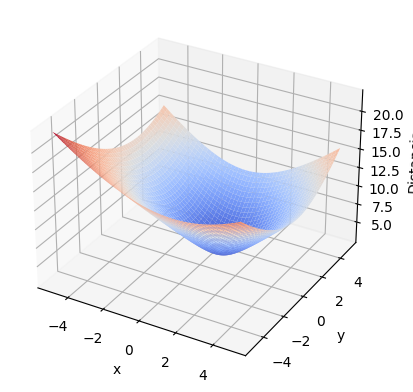

In [ ]:
#b
X= np.arange(-5,5,0.01)
Y= np.arange(-5,5,0.01)
M
D= np.zeros((len(X),len(Y)))
for i in range(len(X)):
  for j in range(len(Y)):
    x= np.array([X[i],Y[j]])
    distancia= np.linalg.norm(np.dot(M,x)-b)
    D[i][j]=distancia

X,Y= np.meshgrid(X,Y)

fig = plt.figure()
ax1= fig.add_subplot(111,projection="3d")
ax1.plot_surface(X,Y,D,cmap="coolwarm")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel("Distancia")

print("La distancia minima del metodo es: {}".format(np.min(D)))

Está distancia es la misma que la resultante del metodo de minimos cuadrados

In [ ]:
#6 

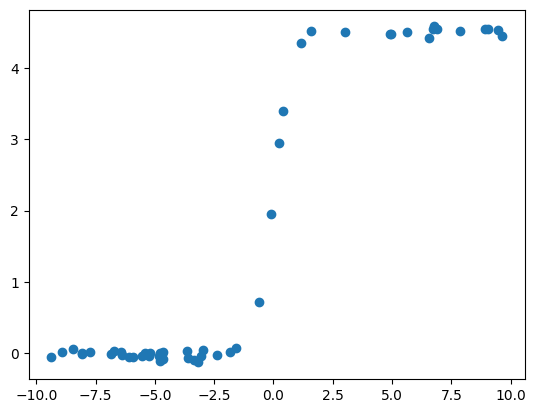

In [ ]:
#7

url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Sigmoid.csv'
data = pd.read_csv(url)

x= data['x']
y= data['y']

plt.scatter(x,y)

#a
theta_0 = sym.symbols("theta_0", real=True)
theta_1 = sym.symbols("theta_1", real=True)
theta_2 = sym.symbols("theta_2", real=True)
x = sym.symbols("x", real=True)

def Modelo_Ajuste():
  return theta_0/(theta_1+sym.exp(-theta_2*x))

#b
def x2(x,y,Theta):
  suma=0
  for i in range(len(x)):
    value= (y[i]-Modelo_Ajuste(x,Theta))**2
    suma+= value
  return suma


$c)$  Muestre las derivadas parciales de la métrica:

$X^2(\vec{\theta})$ es la fución de costo, para hallar su derivada simplemente podemos hallar la derivada dentro de la expresion dada en la sumatoria,aplicando la regla de la cadena, y al resultado, volverle a agregar la suma 

Por ello:

$$
\frac{\partial X^2(\vec{\theta})}{\partial \theta_i}= \sum_{i=1}^N (y_i-M(x_i,\vec{\theta}))^2
$$

$$
\frac{\partial X^2(\vec{\theta})}{\partial \theta_i}=\sum_{i=1}^N2 (y_i-M(x_i,\vec{\theta})) \left( -\frac{\partial M(x_i,\vec{\theta})}{\partial \theta_i}\right) =-2\sum_{i=1}^N (y_i-M(x_i,\vec{\theta})) \left( \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_i}\right)
$$

Demostrando la exresion dada en un comienzo.



$d)$ Partamos de que se puede escribir el paso del metodo del desenso de gradiente de la siguente manera:

$$ x_1 = x_0 -\alpha \nabla_ x f(x_0) \rightarrow x_{n+1} = x_n -\alpha \nabla_ x f(x_n)$$

Donde $x_0$ es el punto de inicio del metodo y f la funcion a minimizar. 

Ahora bien, en nuestro caso $f=X^2(\vec{\theta})$ por lo que podemos expresar su gradiente de la siguente forma. 

$$\nabla_{\theta}X^2(\vec{\theta}) = \left[ -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta_0})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_0}, -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta_1})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_1}, -2\sum_{i=1}^N (y_i - M(x_i,\vec{\theta_2})) \frac{\partial M(x_i,\vec{\theta})}{\partial \theta_2} \right] $$

Exte expresion para el gradiente puede ser vista como 

$$-2*\sum_{i=1}^N (y_i- M(x_i,\vec{\theta_j})\nabla M(x_I,\vec\theta_j)$$

Ahora tomemos el punto inicial como $\theta_{i}$ y el paso de recorrio($\alpha$) como $\gamma$  por lo que reescirbirmos la expresion del metodo como 

$$ \vec\theta_{i+1} = \vec\theta_i -\gamma \cdot(-2*\sum_{j=1}^N (y_i- M(j_i,\vec{\theta_i})\nabla M(x_j,\vec\theta_i) $$

Demostrando asi que vectorialmente, el proceso de minimos cuadrados esta definido por la ecuacion anterior. 



In [ ]:
#e
def Gradiente_M():
  M_d0 = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(Modelo_Ajuste(), theta_0))
  M_d1 = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(Modelo_Ajuste(), theta_1))
  M_d2 = sym.lambdify([x,theta_0,theta_1,theta_2], sym.diff(Modelo_Ajuste(), theta_2))
  return M_d0,M_d1,M_d2


In [ ]:
def Desenzo_Gradiente(M,x,y,theta,it,e,lr):

  error = e + 1
  iterationes = 0
  d0, d1, d2 = Gradiente_M()

  while error > e and iterationes < it:
    suma = 0

    for i in range(len(y)):
      d_0 = d0(x[i],theta[0], theta[1], theta[2])
      d_1 = d1(x[i],theta[0], theta[1], theta[2])
      d_2 = d2(x[i],theta[0], theta[1], theta[2])

      suma += (y[i]-M(x[i],theta[0],theta[1],theta[2]))*np.array([d_0,d_1,d_2])
    
    theta_ = theta - (lr * (-2*suma))
    theta = theta_

    error = np.linalg.norm(lr * (-2*suma))
    iterationes += 1

  return theta_

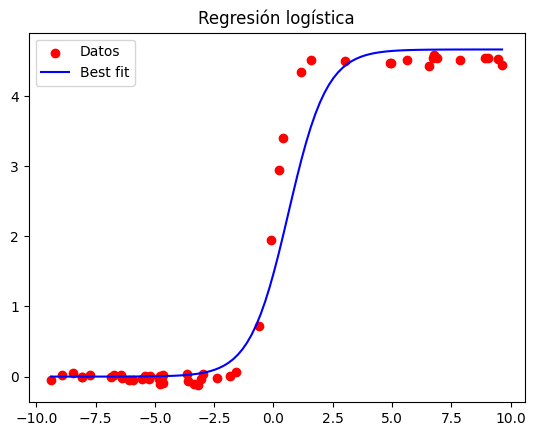

In [ ]:
X=data['x']
Y= data['y']
lr=1e-3
theta=[1,1,1]
e=0.01
it=1e4

M_= sym.lambdify([x,theta_0,theta_1,theta_2],Modelo_Ajuste())
new_theta=Desenzo_Gradiente(M_,X,Y,theta,it,e,lr)

x_=np.linspace(np.min(X),np.max(X),100)
y_=[]

for i in x_:
  u=new_theta[0] / (new_theta[1] + sym.exp(-new_theta[2]*i))
  y_.append(u)

plt.scatter(X,Y,label="Datos",color="r")
plt.plot(x_,y_,label="Best fit",color="b")
plt.title("Regresión logística")
plt.legend()